In [24]:
import pandas as pd 
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

In [25]:
projections = pd.read_excel('C:/Users/kolkd/OneDrive/Desktop/Homework1_SR/Analysis_Data.xlsx', sheet_name='Price Projections', skiprows=2)
cost = pd.read_excel('C:/Users/kolkd/OneDrive/Desktop/Homework1_SR/Analysis_Data.xlsx', sheet_name='Drilling Cost',skiprows=2)

In [42]:
cost["Date"] = pd.to_datetime(cost["Date"])
cost = cost[(cost['Date'].dt.year >= 1990) & (cost['Date'].dt.year <= 2006)]

In [43]:
df = cost.melt(id_vars=["Date"], 
                  value_vars=['Arithmetic Return - Crude Oil', 
    'Arithmetic Return - Natural Gas', 
    'Arithmetic Return - Dry Well'], 
                  var_name="Type", 
                  value_name="Arithmetic Change")
df = df.drop(index=df.index[0]).reset_index(drop=True)
p06 = df[(df['Date'].dt.year) == 2006]['Arithmetic Change'].mean()
df



,Date,Type,Arithmetic Change
0,1991-06-30,Arithmetic Return - Crude Oil,0.077999
1,1992-06-30,Arithmetic Return - Crude Oil,0.044393
2,1993-06-30,Arithmetic Return - Crude Oil,-0.015733
3,1994-06-30,Arithmetic Return - Crude Oil,0.148345
4,1995-06-30,Arithmetic Return - Crude Oil,0.015385
5,1996-06-30,Arithmetic Return - Crude Oil,-0.179894
6,1997-06-30,Arithmetic Return - Crude Oil,0.306745
7,1998-06-30,Arithmetic Return - Crude Oil,0.270197
8,1999-06-30,Arithmetic Return - Crude Oil,0.383392
9,2000-06-30,Arithmetic Return - Crude Oil,-0.242146


In [45]:
df['Arithmetic Change'] = pd.to_numeric(df['Arithmetic Change'], errors='coerce')

In [46]:
df['Arithmetic Change'].dtype

dtype('float64')

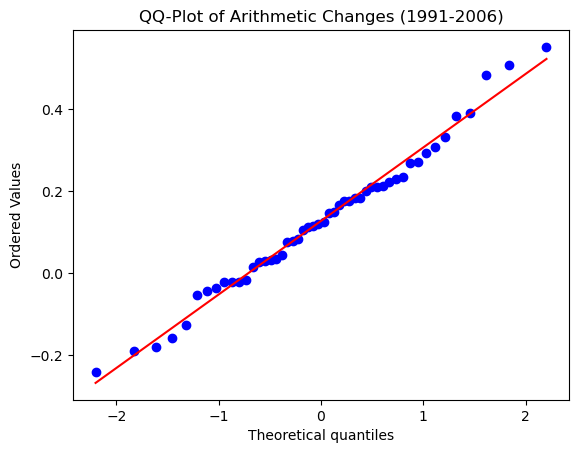

ShapiroResult(statistic=0.9850879118346569, pvalue=0.7753792150040091)


In [47]:
# QQ-Plot
stats.probplot(df['Arithmetic Change'], dist="norm", plot=plt)
plt.title("QQ-Plot of Arithmetic Changes (1991-2006)")
plt.show()

# Shapiro-Wilk Test
p = stats.shapiro(df['Arithmetic Change'])
print(p)


In [29]:
mu = df['Arithmetic Change'].mean()
sigma = df['Arithmetic Change'].std()

In [31]:
np.random.seed(112358)
data = []
for i in range(10000):
    ret = np.random.normal(loc = mu, scale = sigma)
    P0 = p06
    Pt = P0 * (1 + ret)
    for j in range(18):
        if j <= 5:
            ret = np.random.normal(loc = mu, scale = sigma)
            Pt = Pt * (1 + ret)
        elif j > 5 and j <= 8:
            ret = np.random.triangular(left = 0.07, mode = 0.0917, right = 0.22)
            Pt = Pt * (1 + ret)
        elif j > 8 and j <= 18:
            ret = np.random.triangular(left = 0.02, mode = 0.05, right = 0.06)
            Pt = Pt * (1 + ret)
    data.append(Pt)
dfnormal = pd.DataFrame(data)

In [33]:
np.random.seed(112358)
kernel = gaussian_kde(df['Arithmetic Change'])
datak = []
for i in range(10000):
    ret = np.random.normal(loc = mu, scale = sigma)
    P0 = p06
    Pt = P0 * (1 + ret)
    for j in range(18):
        if j <= 5:
            ret = kernel.resample(size = 1).item()
            Pt = Pt * (1 + ret)
        elif j > 5 and j <= 8:
            ret = np.random.triangular(left = 0.07, mode = 0.0917, right = 0.22)
            Pt = Pt * (1 + ret)
        elif j > 8 and j <= 18:
            ret = np.random.triangular(left = 0.02, mode = 0.05, right = 0.06)
            Pt = Pt * (1 + ret)
    datak.append(Pt)
dfk = pd.DataFrame(datak)

In [39]:
print(dfnormal.std())
print(dfk.std())

0    0.403578
dtype: float64
0    0.430125
dtype: float64


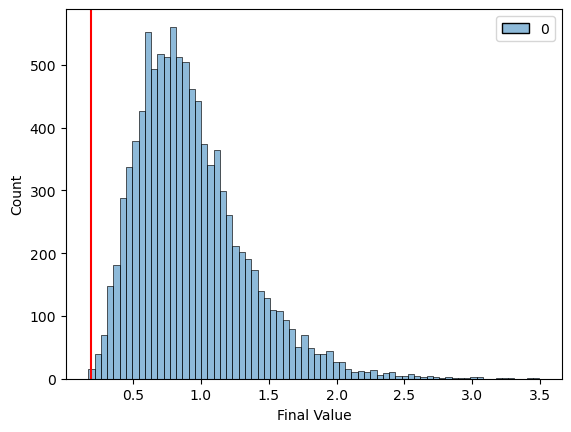

In [34]:
ax = sns.histplot(data = dfnormal)
ax.set(xlabel = "Final Value")
ax.axvline(x = p06, color = "red")

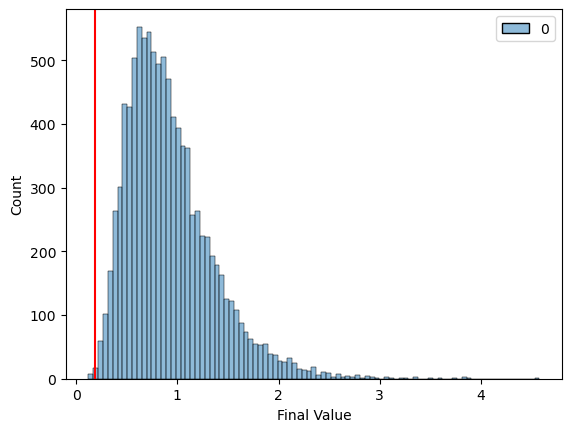

In [35]:
ax = sns.histplot(data = dfk)
ax.set(xlabel = "Final Value")
ax.axvline(x = p06, color = "red")